# Обработка и визуализация данных на примере датасетов "Титаник 1" и "Титаник 2"

Цель выполнения курсовой работы: выявить зависимость выживаемости на Титанике в зависимости от различных критериев.

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Информация о файлах:
 - *titanic_data.csv* содержит различную информацию о пассажирах Титаника (билет, класс, возраст и т.п.)
 - *titanic_surv.csv* содержит для каждого пассажира из первого файла информацию о том, выжил ли этот пассажир (метка 1) или нет (метка 0)




### Чтение из файла
Обычно данные хранятся в виде таблиц в файлах формата .csv или .xlsx. Здесь мы будем загружать данные из .csv файлов.


In [161]:
titanic= pd.read_csv('C:/Users/Admin/Downloads/titanic_data (2).csv', index_col='PassengerId')

Информация о столбцах:

- **PassengerId**: уникальный id пассажира
- **Pclass**: класс каюты, в которой ехал пассажир (1, 2 или 3)
- **Name**: имя пассажира
- **Sex**: пол пассажира
- **Age**: возраст пассажира
- **SibSp**: общее количество братьев, сестер и супругов пассажира, которые также ехали на Титанике
- **Parch**: общее количество родителей и детей пассажира, которые также ехали на Титанике
- **Ticket**: номер билета пассажира
- **Fare**: стоимость билета пассажира
- **Cabin**: номер каюты пассажира
- **Embarked**: в каком порту пассажир сел на Титаник:
  - **S**: Southhampton
  - **C**: Cherbourg
  - **Q**: Queenstown

### Получение общей информации о датасете

Узнаем, в каком классе находилось наибольшее количество человек и какой процент от общего числа пассажиров он составлял.

In [225]:
class_counts = titanic['Pclass'].value_counts(normalize=True) * 100
most_common_class = class_counts.idxmax()
percentage_most_common_class = class_counts.max()
most_common_class, percentage_most_common_class

(3, 55.106621773288445)

Узнаем процентное соотношение мужчин и женщин на борту.


In [226]:
sex_counts = titanic_passengers['Sex'].value_counts(normalize=True) * 100
percentage_male = sex_counts['male']
percentage_female = sex_counts['female']
percentage_male


64.75869809203144

Вычислим процент пассажиров, путешествовавших без братьев, сестер, супругов (SibSp) и без родителей или детей (Parch).

In [228]:
sibsp_counts = titanic_passengers['SibSp'].value_counts(normalize=True) * 100
parch_counts = titanic_passengers['Parch'].value_counts(normalize=True) * 100
percentage_no_sibsp = sibsp_counts[0]
percentage_no_parch = parch_counts[0]
percentage_no_sibsp, percentage_no_parch


(68.23793490460157, 76.0942760942761)

Вычислим среднюю стоимость билета.

In [232]:
average_fare = titanic['Fare'].mean()
fare_std_deviation = titanic['Fare'].std()

average_fare, fare_std_deviation

(32.204207968574636, 49.6934285971809)

Проверим сколько пропущенных значений в нашем файле.

In [162]:
titanic.isna().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Выразим пропущенные значения в процентном соотношении.

In [163]:
(titanic.isna().sum() / len(titanic)).round(4) * 100

Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

Графически покажем пропущенные значения.

Text(0.5, 1.0, 'Пропущенные значения')

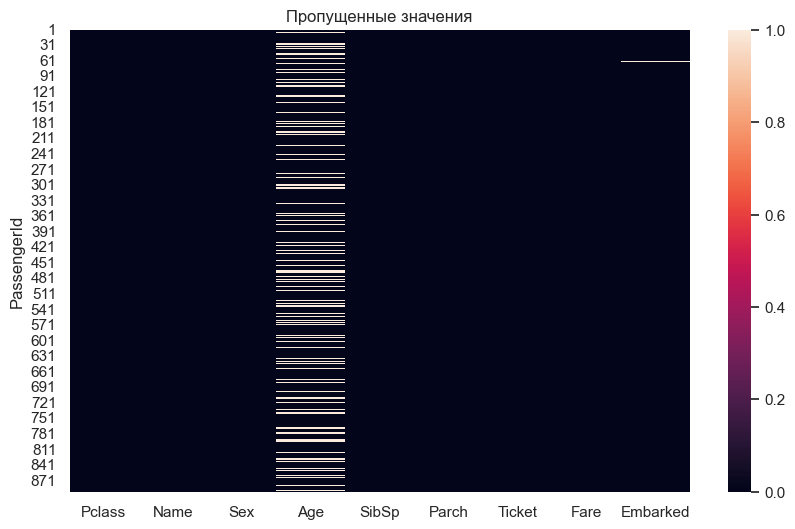

In [237]:
titanic.isnull().sum()
sns.heatmap(titanic.isnull(), cbar = True).set_title("Пропущенные значения")

Ввыведем количество уникальных значений для каждого столбца.

In [165]:
titanic.nunique()

Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

Выведем shape нашей таблицы: информацию о том, сколько в ней строк и столбцов:

In [167]:
titanic.shape

(891, 10)

Метод info() выдает информацию:
- сколько в каждой из колонок таблицы пропусков;
- тип каждой колонки.

In [168]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


Метод .describe() для каждой числовой колонки выдает информацию о статистиках:
- **count**: количество не-NaN значений в колонке;
- **mean**: арифметическое среднее значений в колонке;
- **std**: стардартное отклонение значений в колонке;
- **min**: минимальное значение в колонке;
- **25%**: 25-процентная перцентиль значений в колонке;
- **50%**: 50-процентная перцентиль значений в колонке;
- **75%**: 75-процентная перцентиль значений в колонке;
- **max**: максимальное значение в колонке;

In [169]:
titanic.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Заполнение пропусков.

Поскольку в столбце Cabin более 77% пропусков, необходимо стереть данный столбец. Для этого будем использовать метод .drop()

 Передаем в параметр columns тот столбец, который хотим удалить.

In [207]:
titanic1=titanic.copy()

In [172]:
titanic1.drop(columns = ['Cabin'], inplace = True)

In [173]:
titanic1.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

Переходим к столбцу Age. Изменим размер графиков и посмотрим по графикам на распределение возраста до заполнения пропусков.

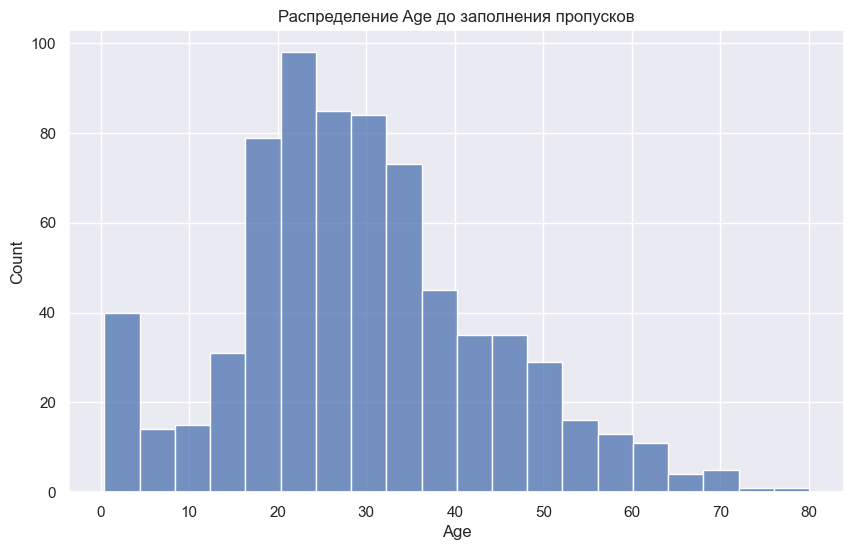

In [174]:
sns.set(rc = {'figure.figsize' : (10, 6)})
median_imputer = titanic1.copy()
sns.histplot(median_imputer['Age'], bins = 20)
plt.title('Распределение Age до заполнения пропусков');

Заполним пропуски в age медианным значением.

In [175]:
median_imputer_bins = titanic1.copy()

In [176]:
Age_bins = median_imputer_bins.groupby(['Sex', 'Pclass'])

In [177]:
median_imputer_bins['Age'] = Age_bins['Age'].transform(lambda x: x.fillna(x.median()))

In [178]:
median_imputer_bins.Age.isna().sum()

0

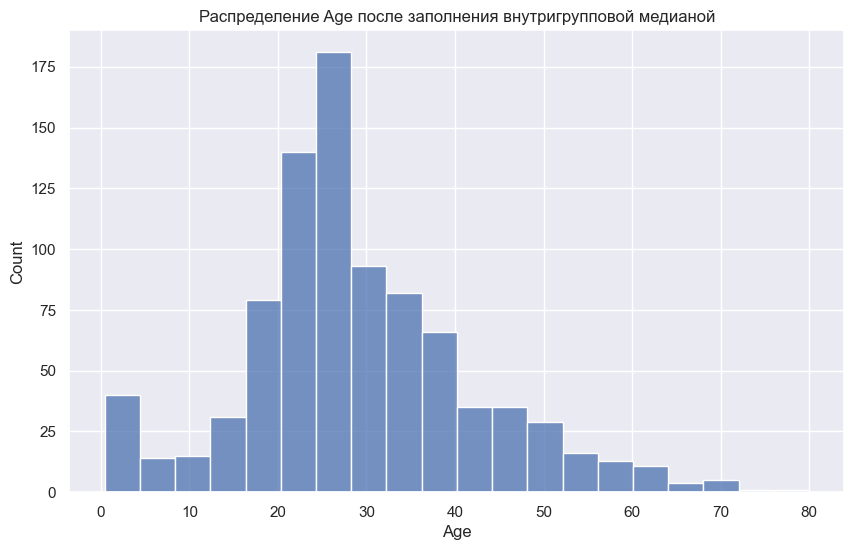

In [179]:
sns.histplot(median_imputer_bins['Age'], bins = 20)
plt.title('Распределение Age после заполнения внутригрупповой медианой');


Выведем для проверки в каких колонках у нас остались пропущенные значения.


(891, 9)

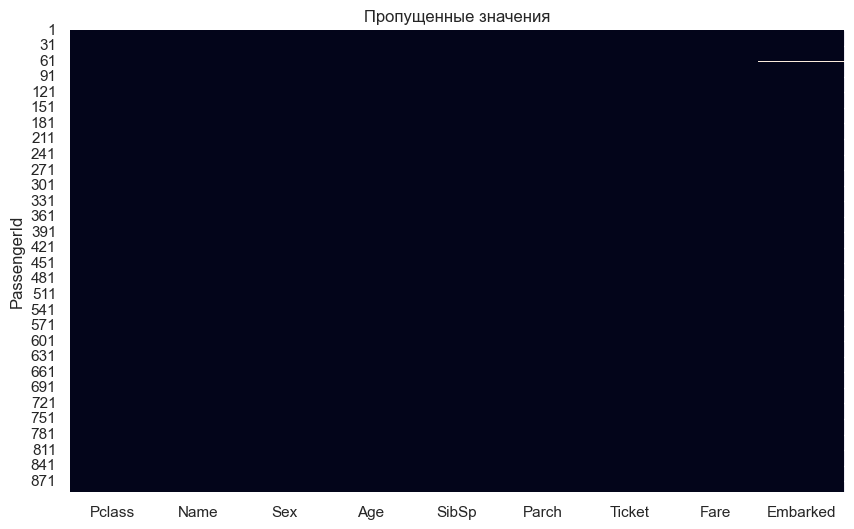

In [183]:
median_imputer_bins.isnull().sum()
sns.heatmap(median_imputer_bins.isnull(), cbar = False).set_title("Пропущенные значения")
median_imputer_bins.shape

Узнаем точное количество пропущенных значений в колонке Embarked.

In [209]:
missing_values_count = median_imputer_bins['Embarked'].isna().sum()
missing_values_count

2

In [210]:
newtitanic = median_imputer_bins.copy()

### Слияние таблиц
Таблицы можно сливать несколькими способами. Мы рассмотрим слияние по индексу: метод называется ``pd.join``.

In [197]:
titanic_surv = pd.read_csv('titanic_surv.csv', index_col='PassengerId')
titanic_surv.head()

,Survived
PassengerId,
0,0
1,1
2,1
3,1
4,0


In [196]:
titanic_passengers = newtitanic.join(titanic_surv)
titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0


Для заполнения пропусков в категориальных данных подойдет метод заполнения наиболее часто встречающимся значением (модой). Если пропусков немного, этот метод вполне обоснован. При большом количестве пропусков, можно попробовать создать на их основе новую категорию.

Подготовим данные и посмотрим на распределение категорий в столбце Embarked.

In [193]:
titanic_passengers.groupby('Embarked')['Survived'].count()

Embarked
C    168
Q     76
S    644
Name: Survived, dtype: int64

Необходимо узнать процент выживших (Survived) на Титанике.

In [220]:
survived_counts = titanic_passengers['Survived'].value_counts(normalize=True) * 100
percentage_survived = survived_counts[1]
percentage_survived


38.42696629213483

In [248]:
newtitanic=titanic_passengers.copy()

Узнаем наиболее часто встречающееся значение в Embarked.

In [249]:
newtitanic.Embarked.value_counts().index[0]

'S'

Заменим пропущенные значения в колонке Embarked на наиболее встречающееся значение.


In [251]:
newtitanic['Embarked'].fillna(titanic_mode['Embarked'].mode()[0], inplace=True)

Проверим, остались ли в колонках пропущенные значения.


(891, 10)

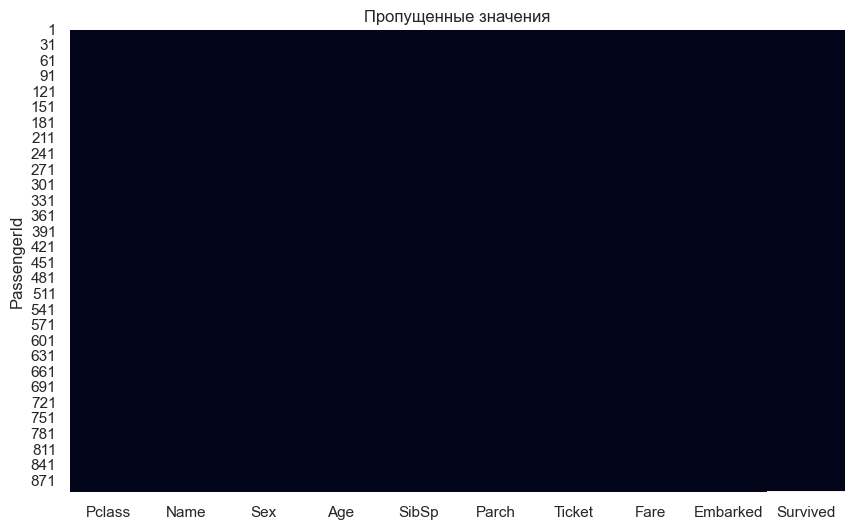

In [252]:
sns.heatmap(newtitanic.isnull(), cbar = False).set_title("Пропущенные значения")
newtitanic.shape

<font color='blue'><b>Как видим, подготовка к выполнению нашей главной задачи - визуализации выживаемости от различных критериев закончена, так как все колонки необходимые для анализа заполнены, пропущенных значений нет.</b></font>

### Работа с отдельными столбцами.

Создадим новую колонку, в которую запишем для каждого пассажира общее число его родственников на борту Титаника. Это просто сумма колонок SibSP и Parch:

In [255]:
total_relatives = newtitanic['SibSp'] + newtitanic['Parch']
total_relatives

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    3
890    0
891    0
Length: 891, dtype: int64

И добавим эту колонку к таблице. Назовем ее "TotalRelatives":

In [256]:
newtitanic['TotalRelatives'] = total_relatives

In [257]:
newtitanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,TotalRelatives
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,0


Отлично, добавлять колонки научились. Но иногда нужно их и удалять. Удалять можно с помощью метода drop():

In [258]:
newtitanic1 = newtitanic.copy()

In [259]:
newtitanic1 = newtitanic1.drop(columns=['SibSp', 'Parch'])
newtitanic1.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Survived,TotalRelatives
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1.0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1.0,1
3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1.0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0.0,1
5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0.0,0


Можно изменять часть значений колонки по некоторому условию. Например,изменим колонку Sex на числовую: вместо ‘male’ напишем 0, вместо ‘female’ — 1.

Вот как можно заменить все значения 'male' на 0 в колонке Sex:


In [273]:
newtitanic1.loc[ newtitanic1['Sex']=='male', 'Sex'] = "мужской"

И аналогично заменим все значения 'female' на 1:

In [274]:
newtitanic1.loc[ newtitanic1['Sex']=='female', 'Sex'] = "женский"

In [271]:
newtitanic1.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Survived,TotalRelatives
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,S,1.0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C,1.0,1
3,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,S,1.0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,S,0.0,1
5,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,S,0.0,0


### Распределение выживших в зависимости от пола

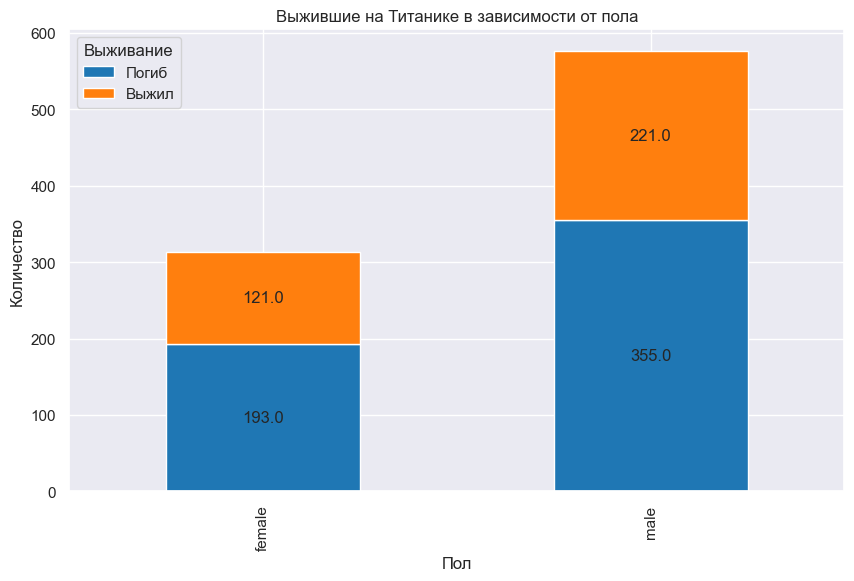

In [280]:
import matplotlib.pyplot as plt

ax = survival_by_sex.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Выжившие на Титанике в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(['Погиб', 'Выжил'], title='Выживание')
plt.show()


Процент выживших среди женщин - 61.46%

Процент выживших среди мужчин - 61.63%

### Зависимость выживаемости от возраста

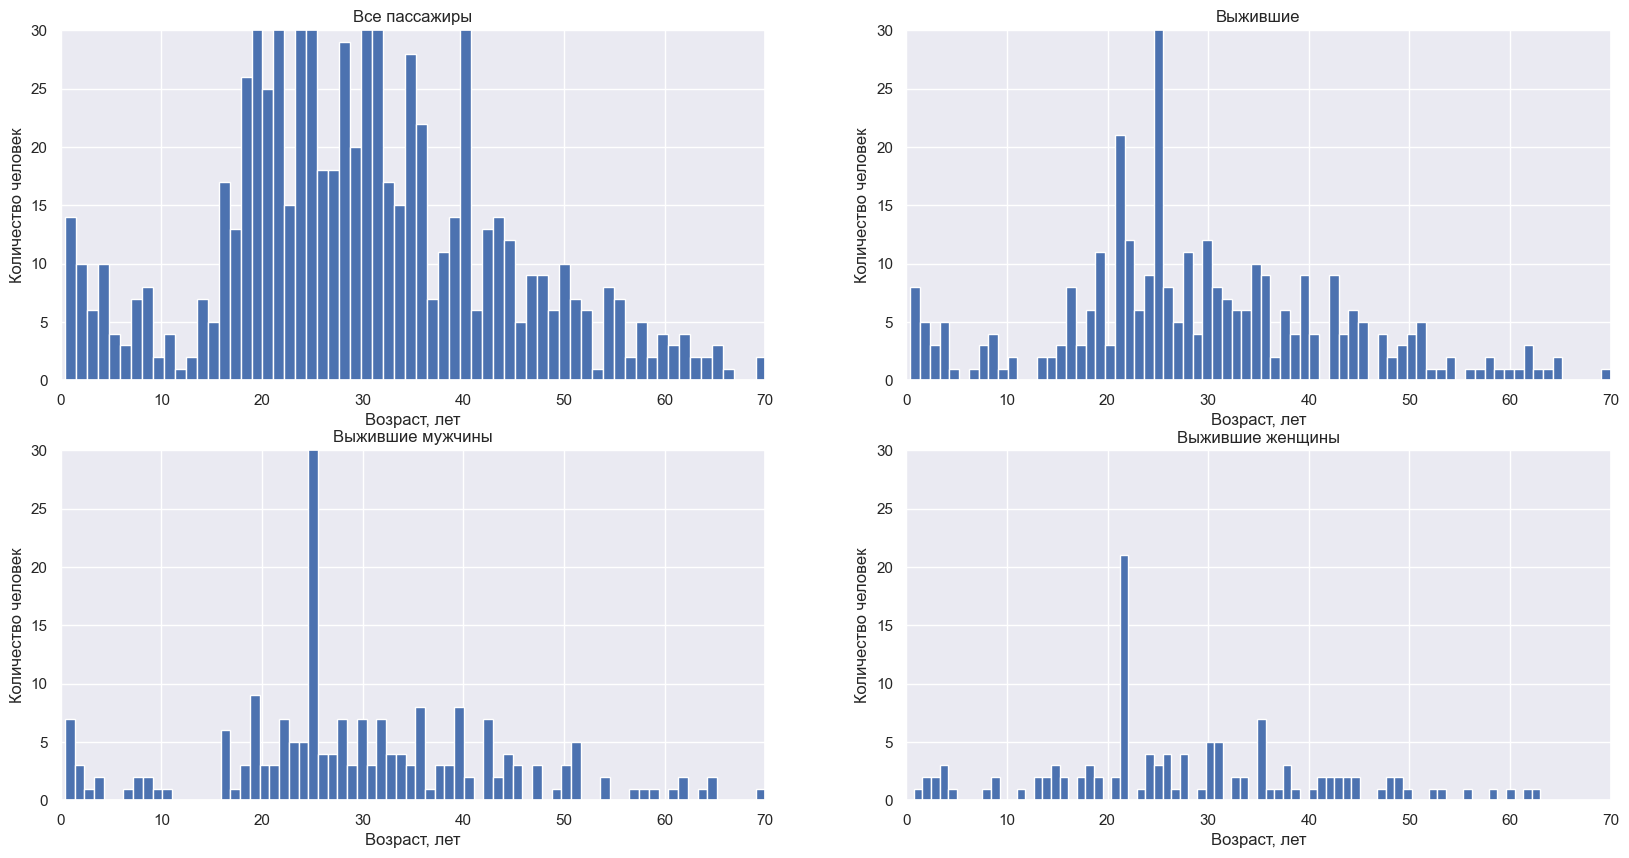

In [286]:
from collections import Counter


survivors = newtitanic.loc[(newtitanic['Survived'] == 1)]
male_survivors = newtitanic.loc[((newtitanic['Sex'] == 'male') & (newtitanic['Survived'] == 1))]
female_survivors = newtitanic.loc[((newtitanic['Sex'] == 'female') & (newtitanic['Survived'] == 1))]

#Число возрастов
num_of_ages = len(dict(Counter(survivors['Age'])).keys())

#Визуализируем
fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(10)
names = [['Все пассажиры', 'Выжившие'], ['Выжившие мужчины', 'Выжившие женщины']]
for i, surv in enumerate([[newtitanic, survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['Age'], bins=num_of_ages)
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('Возраст, лет')
        axs[i][j].set_ylabel('Количество человек')
        axs[i][j].set_ylim(0,30)
        axs[i][j].set_xlim(0,70)
plt.show()

In [344]:
import numpy as np

children = newtitanic.loc[((newtitanic['Age'] < np.float64(18.0)) & (newtitanic['Age'] > 0))]
survivors_children = newtitanic.loc[((newtitanic['Age'] < np.float64(18.0)) & (newtitanic['Survived'] == 1) & (newtitanic['Age'] > 0))]
print(f'Пасажиров до 18 лет спаслось {round(len(survivors_children)*100/len(children), 2)}%')

Пасажиров до 18 лет спаслось 45.13%


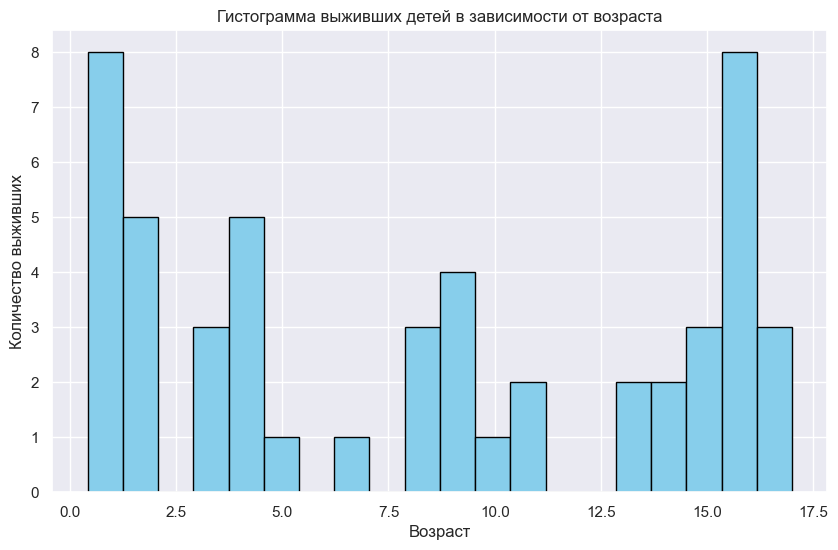

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
survived_children = newtitanic.loc[((newtitanic['Survived'] == 1) & (newtitanic['Age'] > 0) & (newtitanic['Age'] < 18))]
plt.figure(figsize=(10, 6))
survived_children['Age'].hist(color='skyblue', bins=20, edgecolor='black')
plt.title("Гистограмма выживших детей в зависимости от возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество выживших")
plt.show()


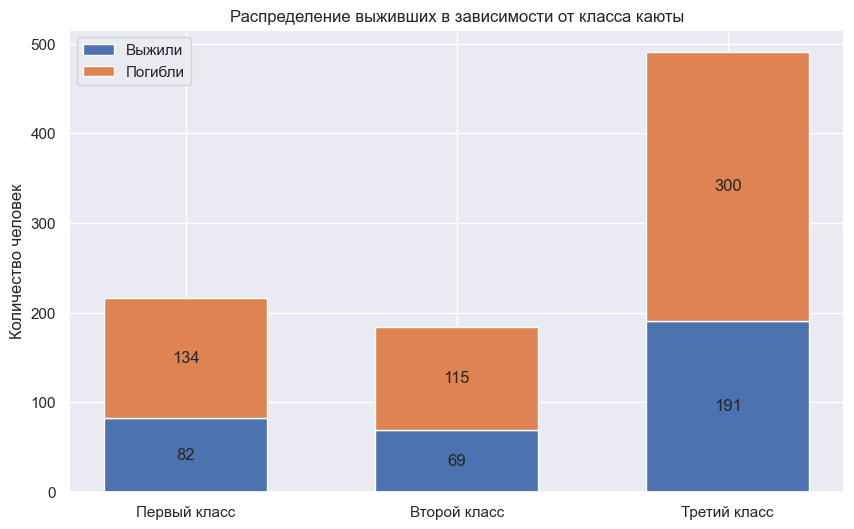

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
first_total = len(newtitanic.loc[(newtitanic['Pclass'] == 1)])
second_total = len(newtitanic.loc[(newtitanic['Pclass'] == 2)])
third_total = len(newtitanic.loc[(newtitanic['Pclass'] == 3)])
first_survived = len(newtitanic.loc[((newtitanic['Pclass'] == 1) & (newtitanic['Survived'] == 1))])
second_survived = len(newtitanic.loc[((newtitanic['Pclass'] == 2) & (newtitanic['Survived'] == 1))])
third_survived = len(newtitanic.loc[((newtitanic['Pclass'] == 3) & (newtitanic['Survived'] == 1))])

survivors_counts = {
    'Выжили': [first_survived, second_survived, third_survived],
    'Погибли': [first_total - first_survived, second_total - second_survived, third_total - third_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(('Первый класс', 'Второй класс', 'Третий класс'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от класса каюты')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()


Родственники на борту

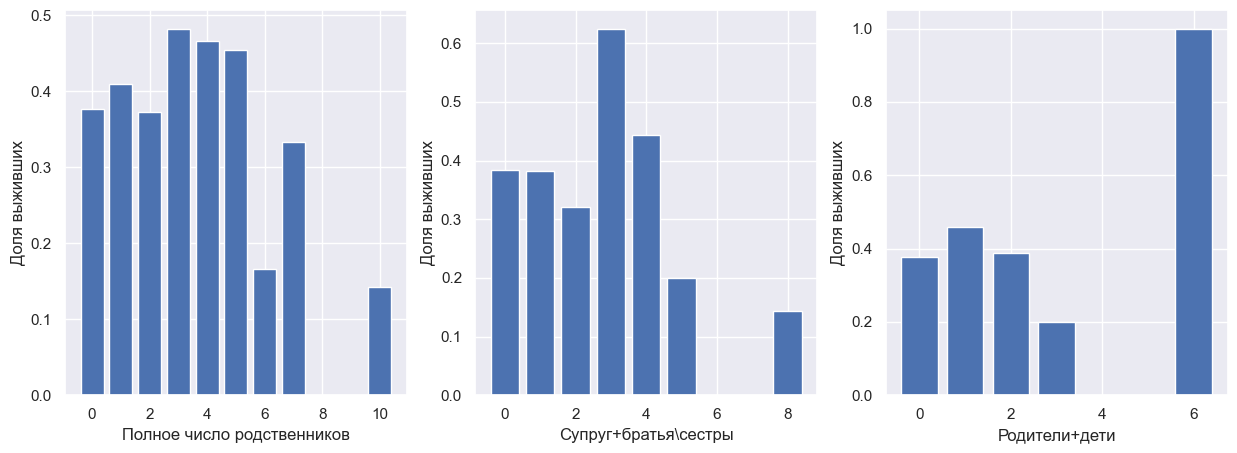

In [336]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt





sibsp_total = dict(Counter(newtitanic.SibSp))
parch_total = dict(Counter(newtitanic.Parch))
family_total = dict(Counter(newtitanic.Family))
sibsp_survived = dict(Counter(newtitanic.loc[(newtitanic['Survived'] == 1)].SibSp))
parch_survived = dict(Counter(newtitanic.loc[(newtitanic['Survived'] == 1)].Parch))
family_survived = dict(Counter(newtitanic.loc[(newtitanic['Survived'] == 1)].Family))
relatives = (family_total, sibsp_total, parch_total)
relatives_survived = (family_survived, sibsp_survived, parch_survived)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
xlabs = ('Полное число родственников', 'Супруг+братья\сестры', 'Родители+дети')

for i in range(3):
    probs = []
    for rel, amount in relatives_survived[i].items():
        probs.append(amount / relatives[i][rel])
    axs[i].bar(relatives_survived[i].keys(), probs)
    axs[i].set_ylabel('Доля выживших')
    axs[i].set_xlabel(xlabs[i])
plt.show()


<Axes: >

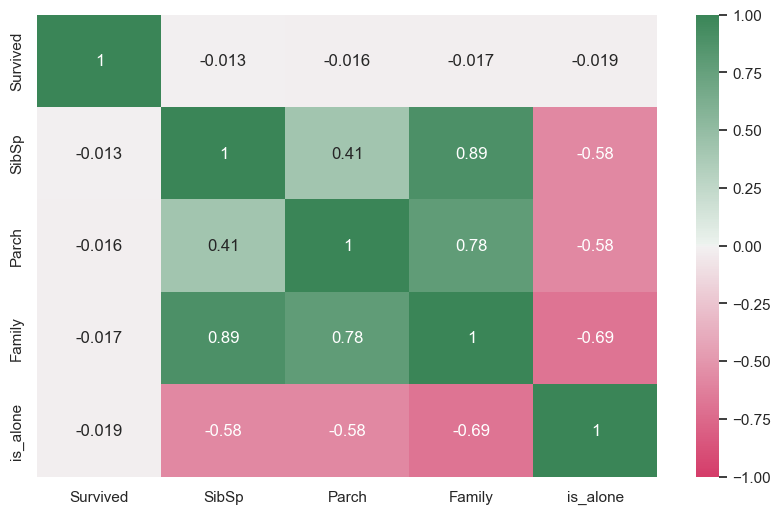

In [342]:
import seaborn as sns
import pandas as pd


is_alone = []
for fam in newtitanic.Family:
    if fam == 0:
        is_alone.append(1)
    else:
        is_alone.append(0)

data = pd.DataFrame({
    'Survived': newtitanic['Survived'],
    'SibSp': newtitanic['SibSp'],
    'Parch': newtitanic['Parch'],
    'Family': newtitanic['Family'],
    'is_alone': is_alone
})

sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(0, 500, as_cmap=True))


Построение корреляционной карты.

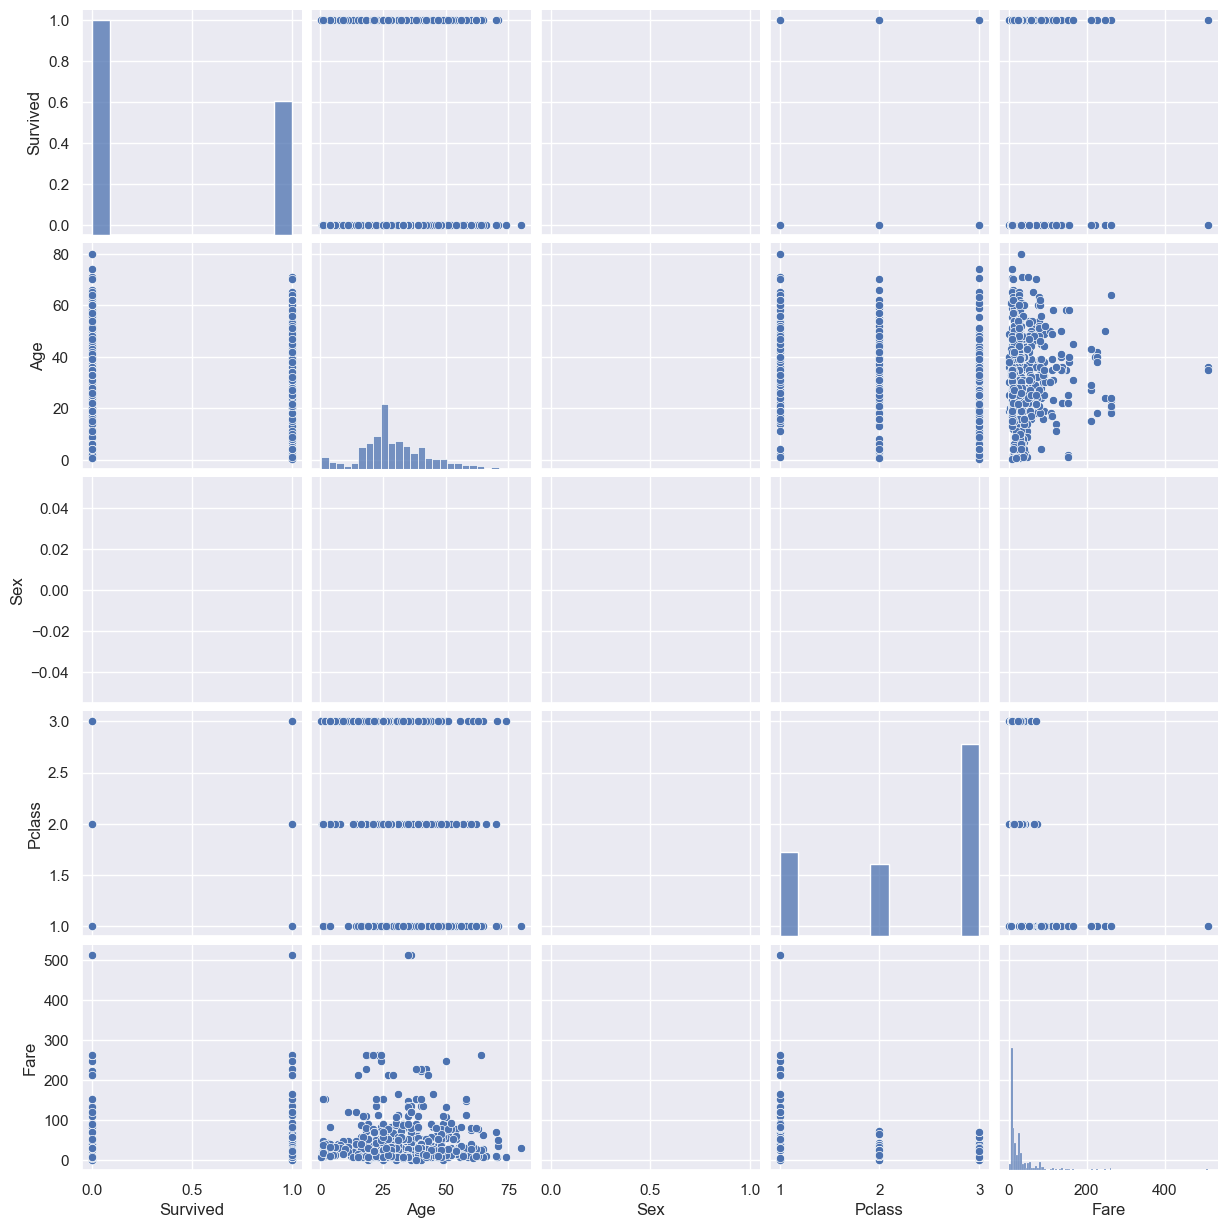

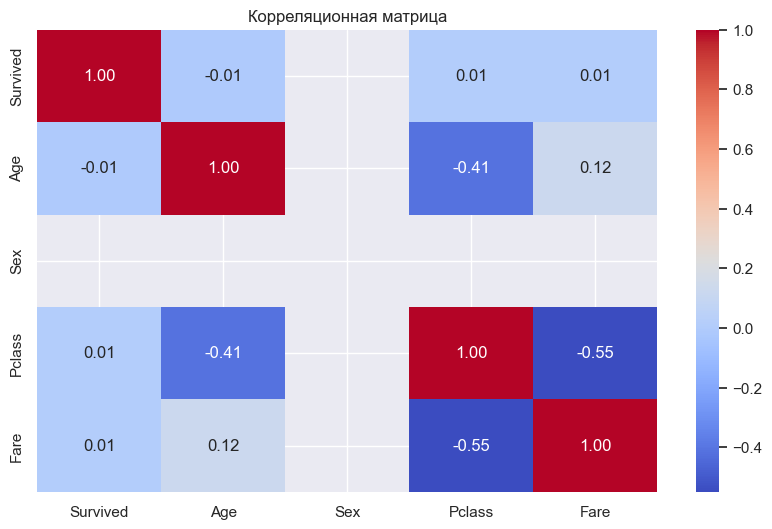

In [326]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
newtitanic = newtitanic.dropna(subset=['Age', 'Sex', 'Pclass', 'Survived'])
newtitanic['Sex'] = newtitanic['Sex'].map({'male': 0, 'female': 1})
sns.pairplot(newtitanic[['Survived', 'Age', 'Sex', 'Pclass','Fare']])
plt.show()


correlation_matrix = newtitanic[['Survived', 'Age', 'Sex', 'Pclass','Fare']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()


Билеты и порт отправления.

<Axes: >

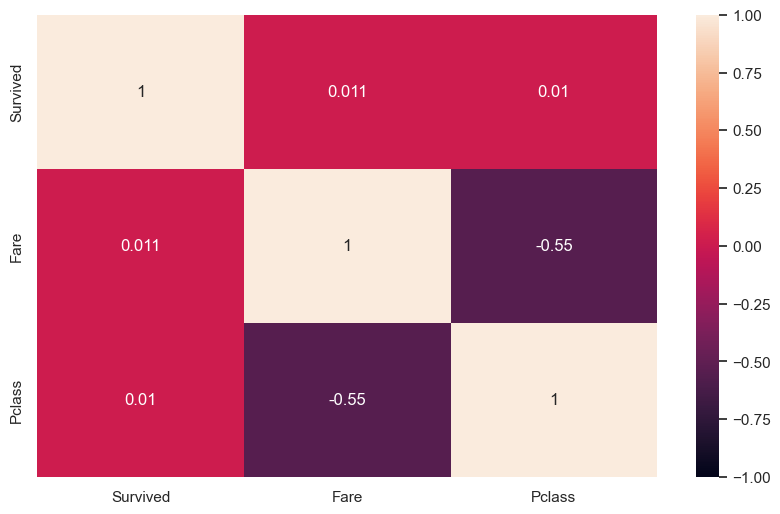

In [308]:
sns.heatmap(newtitanic[['Survived', 'Fare', 'Pclass']].corr(), annot=True, vmin=-1, vmax=1)

Функция Scatter позволяет визуализировать точки на декартовой плоскости по их координатам.

Text(0, 0.5, 'Fare')

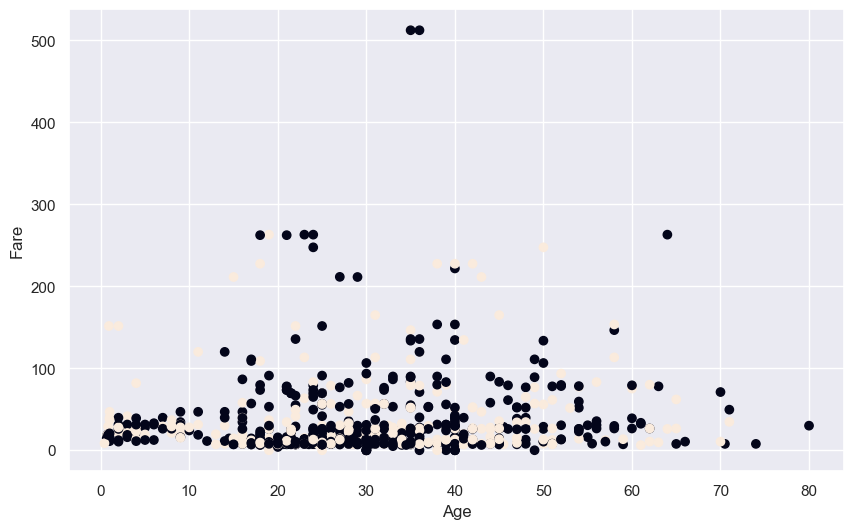

In [216]:
plt.scatter(titanic_passengers['Age'], titanic_passengers['Fare'], c=titanic_passengers['Survived'])

plt.xlabel('Age')
plt.ylabel('Fare')

#### Pairplot

Функция Pairplot позволяет получать такие же визуализации, как мы строили выше с помощью Scatter, для всех пар числовых колонок сразу.


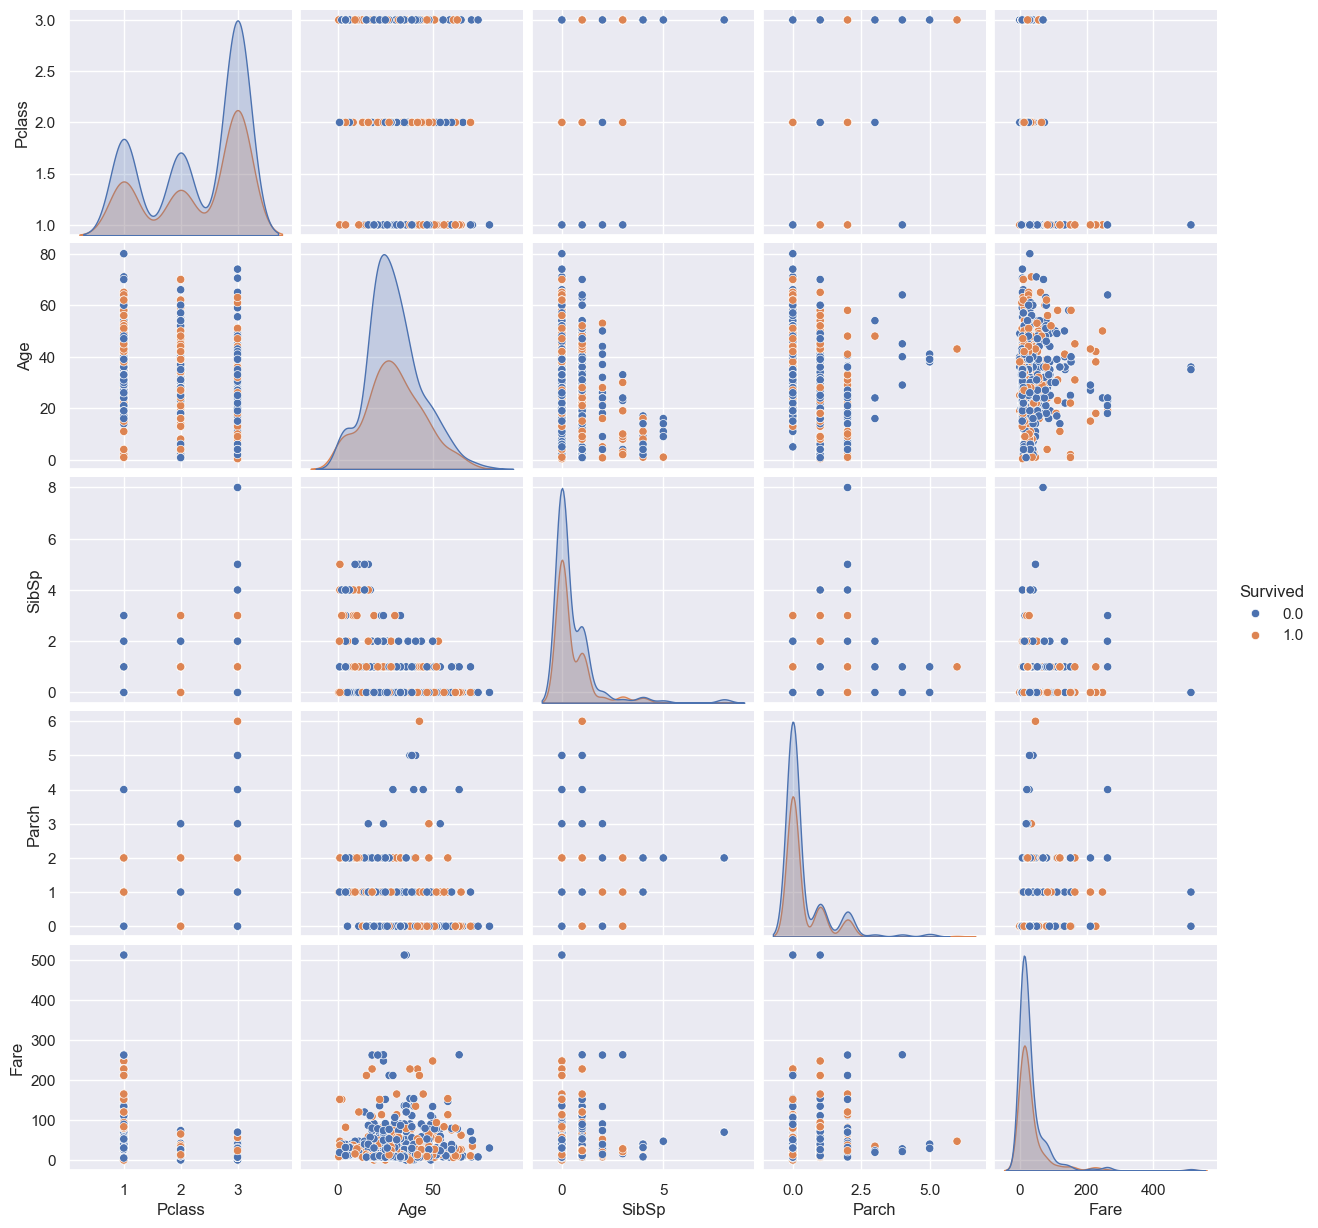

In [321]:
sns.pairplot(titanic_passengers, hue="Survived")

In [ ]:
sns.countplot(titanic_passengers['Age'], hue=titanic_passengers["Survived"])